In [2]:
import pickle
import numpy as np
Xd = pickle.load(open("RML2016.10a_dict.pkl",'rb'), encoding='latin1')
print(len(Xd[list(Xd.keys())[0]]))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
#we have labels for each one of them woowoo
#mods are all the classes are 11
X.shape
len(list(lbl))

1000


220000

In [3]:
np.random.seed(2016)
n_examples = X.shape[0]
n_train = int(n_examples * 0.5) #half the dataset is for training
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False) 
#"replace" makes sure that everything is unique
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
X_train.shape

(110000, 2, 128)

In [4]:
def to_onehot(yy):
    yy1 = np.zeros([len(list(yy)), max(list(yy))+1])
    yy1[np.arange(len(list(yy))),yy] = 1
    return yy1
# Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test_ = map(lambda x: mods.index(lbl[x][0]), test_idx)
Y_train_ = map(lambda x: mods.index(lbl[x][0]), train_idx)
j = 0
Y_train_list = list()
Y_test_list = list()
for i in Y_train_:
    Y_train_list.append(i)
for i in Y_test_:
    Y_test_list.append(j)
    
Y_train = to_onehot(Y_train_list)
Y_test = to_onehot(Y_test_list)
# Y_test is 11k
# Y_train is also 11k wondering why? look the second cell from top


In [5]:
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods
len(classes)

(110000, 2, 128) [2, 128]


11

In [6]:
%matplotlib inline
from fastai import *
from fastai.vision import *


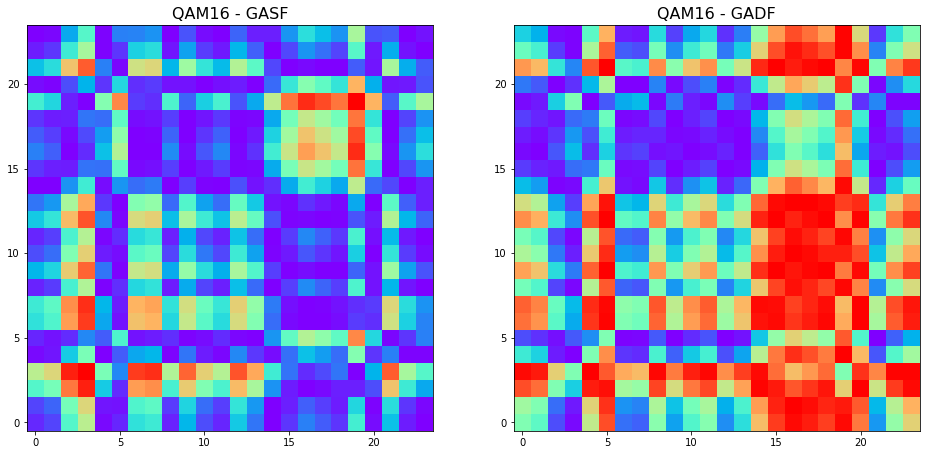

In [20]:
# Trying to plot the graphs... lets see what happens
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GASF, GADF

t = []
for i in range(128):
    t.append(i)
signals = X
for j in range(150000, 150001): #len(X) == 220000
    #print('Signal Example', j + 1)
    wave_type = lbl[j][0]
#     first = signals[j][:][0]
#     second = signals[j][:][1]
    values = signals[j][:]
    image_size = 24
    gasf = GASF(image_size)
    X_gasf = gasf.fit_transform(values)
    gadf = GADF(image_size)
    X_gadf = gadf.fit_transform(values)
    plt.figure(figsize=(16, 8))
    plt.subplot(121)
    plt.imshow(X_gasf[0], cmap='rainbow', origin='lower')
    plt.title("%s - GASF"%wave_type, fontsize=16)
    plt.subplot(122)
    plt.imshow(X_gadf[0], cmap='rainbow', origin='lower')
    plt.title("%s - GADF"%wave_type, fontsize=16)
    plt.show()
#     plt.plot(t, first/second)
# #     plt.plot(t, second)
#     wave_type = lbl[j][0] #Dumbass of course it stops after a while you only have a certain 
    #as it is not what you thought it was. We need a class for all of them
#     title = wave_type
#     plt.title(title)
#     xmax = 128
#     ymax = max([max(first),max(second)])
# #     plt.xticks([])
# #     plt.yticks([])
#     plt.show()



    

Experiments.ipynb  LICENSE.TXT	plot_gaf.ipynb	pyts  RML2016.10a_dict.pkl
